## Fundamental Graphics

In [36]:
""" Expand the minimal function of the previous example
by returning a value. This value is used to compose
a list (the row) at the higher level - the main function

Instead of printing all segments directly we construct a list of lists.
We print row by row at the end of the program by iterating through the rows.

We also use a function for the main body of the program and call it main()
This is usefull for more complex scenarios when we use multiple files

"""

# function to make one linear segment of a pattern
def segment(seg,width, color):
    """ append <width> items of <color> to a <seg>ment
    Returns new segment
    """
    # add items with a FOR LOOP
    for i in range(width):
        seg.append(color)
    # return the list
    return seg

# the main function
def main():
    """create a checker board pattern using a function as a list of lists
    Print row by row at the end"""
    # constants
    FIELDS = 4
    FIELD_WIDTH = 4

    # variables
    row = 0
    column = 0
    # set color to 0
    color = 0
    # create the empty board
    board = []
    # create an empty line to start with
    line = []
    while row < FIELDS*FIELD_WIDTH and column < FIELDS*FIELD_WIDTH:
        # append the segment to the line
        line = segment(line,FIELD_WIDTH,color)
        # invert color
        color = 1 if color == 0 else 0
        # increment column
        column = column + FIELD_WIDTH if column < FIELD_WIDTH*(FIELDS-1) else 0
        # if column == 0 then previous line is complete.
        # add line to board, increment row and start a new line
        if column == 0:
            board.append(line)
            row = row + 1
            line = []
        # invert color again if new row and end of field
        if column == 0 and row % FIELD_WIDTH == 0 :
            color = 1 if color == 0 else 0

    print("Checker board, row by row. One list per row")
    for b in brd:
        print(b)  

# call the main function
if __name__ == "__main__":
    help(main)
    help(segment)
    main()


Help on function main in module __main__:

main()
    create a checker board pattern using a function as a list of lists
    Print row by row at the end

Help on function segment in module __main__:

segment(seg, width, color)
    append <width> items of <color> to a <seg>ment
    Returns new segment

Checker board, row by row. One list per row
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 

## Pretty Print
Iterating through the rows is not so convenient and it doesn't show the entire data structure. 
We could print the entire object, but that doesn't look nice (try for yourself).

We use the *pprint* (pretty print) library to get a nice output for the entire array. Note the outer brackets and the commas.

In [38]:
import pprint
pprint.pprint(brd)

[[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]]


## Simple Graphics
Besides printing the 2D array using 1' and 0' we can also display it as a pixel image
using one of the fundamental drawing libraries in Python: matplotlib

Matplotlib gives us several function to display graphics and images

See also [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)

Matplotlib also has some color functions, see [https://matplotlib.org/stable/gallery/color/colormap_reference.html](https://matplotlib.org/stable/gallery/color/colormap_reference.html)


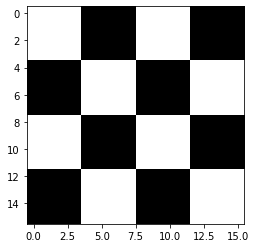

In [39]:
# the next line is just a hint for the notebook server how to display graphics
# you don't need it with standalone Python
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(brd,cmap="Greys")
# When ou can run this code from plain python, not within a notebook,
# you will need to call the plt.show() function to actually see
# the plot. We don't need this here
#plt.show()


## Numpy
We are now importing the *numpy* library. Numpy provides advanced math capabilities which 
helps working with theses 2-dimensional arrays (lists).

See also [https://numpy.org/doc/stable/user/index.html](https://numpy.org/doc/stable/user/index.html)



Shape of the board is  (16, 16) pixels


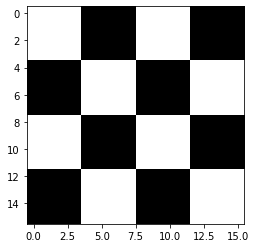

In [21]:
import numpy as np

# we create numpy an array from our lists 
a = np.array(brd)
# The cmap parameter defines the color map. 
plt.imshow(a,cmap="Greys")

# The result looks exactly like the one before without numpy
# But we are now able to get the dimensions of the array via the "shape" aatribute
print("Shape of the board is ",a.shape, "pixels")

# and you will see more interesting stuff soon ...

## Indexing 2D arrays
As seen before, we can access list elements via an index, written in square brackets. With 2D array we can also use indexes and we simply place two square brackets in a sequence, like **a[1][2]**

This relates to the pixel in the second row and third column. **We start numbering at 0!** 

With numpy, we can write indexes also like **a[2,3]**, a single pair of square brackets containing a list of indexes. 

Finally, we can use ranges inside the index list, like **a[0,0:3]**

As you might have guessed, we can also provide a list when we use a list range.


In [40]:
# we create an array of zeros with 3 rows and 5 columns
a = np.zeros((3,5))
# we set the value at index[1][2] to 1
a[1][2] = 1
print("Element in second row, third column is now 1")
pprint.pprint(a)

a[2,4] = 2
print("Element in third row, fifth column is now 2")
pprint.pprint(a)

a[0,0:4] = 5
print("First 4 columns in first row are now 5")
pprint.pprint(a)

a[2,0:3] = (7,8,9)
print("First 3 columns in third row are now 7,8,9")
pprint.pprint(a)


Element in second row, third column is now 1
array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])
Element in third row, fifth column is now 2
array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 2.]])
First 4 columns in first row are now 5
array([[5., 5., 5., 5., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 2.]])
First 3 columns in third row are now 7,8,9
array([[5., 5., 5., 5., 0.],
       [0., 0., 1., 0., 0.],
       [7., 8., 9., 0., 2.]])


In [23]:
# When we want to save our first image to the computer
# we need to create the directory "data" for the results, 
# To do this, we have to import another module (library): os
import os

# we use a constant to name the target directory 
# Note: Python doesn't have constants, it's just a 
# convention to use upper case names

TARGET_DIR = "data"
# if the directory doesn't exist, we create it
if not TARGET_DIR in os.listdir():
    os.mkdir(TARGET_DIR)

# we use a variable for the file name, as we will 
# be saving different images ...
file = "checker1.jpg"

# the following looks a bit complicated but 
# provides a portable way for all operating systems
# to declare path names
plt.imsave(os.path.sep.join([TARGET_DIR,file]),brd,cmap="Greys")

Now we have written the image to the path data/checker1.jpg. If this was successfull,
we should be able to find it there with the file browser. Also, we should see the file in this box:

![](data/checker1.jpg)

You notice that the image looks MUCH smaller, because it now is shown in its actual size, for example 16x16 pixel for 4 fields of width 4. The plt.imshow() command tries to scale every image to a reasonable size for inline display.


## Arrays from scratch and random
We can construct arrays from scratch using a variety of numpy functions. Here we use an empty array and fill it with random integers from the *random* library


In [24]:
# Now we create an empty array of a specific size
rows = 6
cols = 10
ar = np.empty((rows,cols))

# the value of the elements are undefined, so we have to assign something
# This time, we use the random library to fill the array
# with elements between 0 and 255.
# Note: every time you run this cell you will get different values
import random
for i in range(ar.shape[0]):
    for j in range(ar.shape[1]):
        ar[i,j] = random.randint(0,256)

pprint.pprint(ar)
#import matplotlib.colors as mcol


array([[ 27., 131.,  39.,  66., 243., 124.,  23., 253., 251.,  67.],
       [ 67., 207., 170., 146., 140., 190.,  44., 212.,  25., 122.],
       [166., 242.,  48.,  76.,   0.,  60.,   6., 169.,  54., 200.],
       [158., 220., 251., 101., 212., 126., 119., 229., 162.,  46.],
       [113.,  24., 200., 255.,  31., 233.,  72.,  70.,  99., 151.],
       [141., 142., 180., 157., 134., 214., 184., 163., 200., 199.]])


We use a different color map this time on the first file.

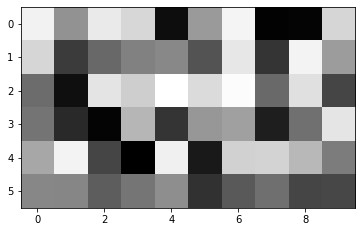

In [25]:
plt.imshow(ar,cmap="Greys")
plt.show()

file = "random1.jpg"

# the following looks a bit complicated but 
# provides a portable way for all operating systems
# to declare path names
plt.imsave(os.path.sep.join([TARGET_DIR,file]),ar,cmap="Greys")

Then we scale the size of the image by repeating the 
pixel across the two different axes corresponding to rows and columns

New shape after axis 0 :  (600, 10)
New shape after axis 1 :  (600, 1000)


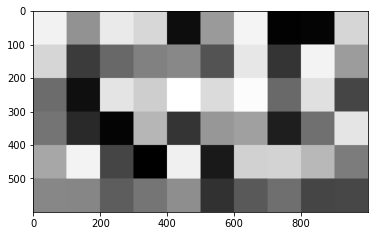

In [26]:
# make the image larger by repeating every pixel
# repeat rows via axis 0
axis = 0
# using a different name here is saver when we go through the notebook
# at differnt places as we use ar above already
ar1 = ar.repeat(100,axis=axis)
print("New shape after axis",axis,": ", ar1.shape)
# repeat columns via axis 1
axis = 1
ar1 = ar1.repeat(100,axis=axis)
print("New shape after axis",axis,": ", ar1.shape)

# save this file again
file = "random2.jpg"
plt.imsave(os.path.sep.join([TARGET_DIR,file]),ar1,cmap="Greys")

plt.imshow(ar1,cmap="Greys")
#plt.show()

Both images above are displayed at the same size. However you can notice from the axes that their 
size is actually quite different. You will see the real size when you open the images from their folder.  

## Loading Images
We can load images from the filesystem and turn them into 2D-arrays for processing. 

Shape of image is  (6, 10, 3)
Value in row 0, col 0 is:  [237 237 237]


(-0.5, 9.5, 5.5, -0.5)

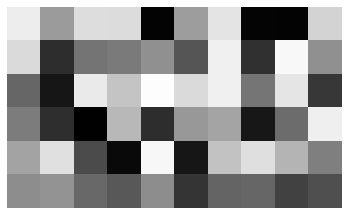

In [27]:
# we load the first random file
file = "random1.jpg"
img = plt.imread(os.path.sep.join([TARGET_DIR,file]))
print("Shape of image is ",img.shape)
# we display first value
print("Value in row 0, col 0 is: ",img[0,0])

plt.imshow(img)
# to make the display look more like an image and not like a diagram we turn off
# the axes display
plt.axis('off')


We notice that the shape of the numpy array has changed: 

**we have a third dimension of size 3.**

This is because we saved the image using a certain color map *cmap*, which expands the byte values to standard RGB (red-green-blue) color *channels*. Each RGB value has 3 bytes. This is what we have on disk and what we see here. 

When we use a colormap different to *Greys*, which assigns the same value to all three channels, we might also notice that the colors are not exactly the ones displayed above, however they match the colors we see when we open the file from disk. This depends on the cmap used during display and saving. And matplotlib's color mapping is optimized for data displays, not for images 

Showing the image using a color map and saving the image using a color map does not always produce the same result.
For the moment, we stick with grayscale images, or single color cmaps like "Greens", "Reds", "Blues".



## Modifying Pixels
We will apply some basic operations to the image we have just loaded:

 * Make a copy, so we can keep the original
 * Set a row and a column to a specific value
 * Apply a mask using a threshold value and set all mask pixel to a specific value
 
 The masking produces a new array of boolean (True/False) values of same size. The element is True if the masking condition hold (e.g. value < 100). The subsequent assignment is effective only for the *True* elements.
 
 Remember, we have now 3 color channels, but assuming grayscale we can simply assign a single value.

Shape is  (6, 10, 3)
Third row, initially: 
array([[170, 170, 170],
       [157, 157, 157],
       [255, 255, 255],
       [201, 201, 201],
       [135, 135, 135],
       [247, 247, 247],
       [219, 219, 219],
       [124, 124, 124],
       [111, 111, 111],
       [253, 253, 253]], dtype=uint8)
Third row, modified: 
array([[250, 250, 250],
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250]], dtype=uint8)
New image


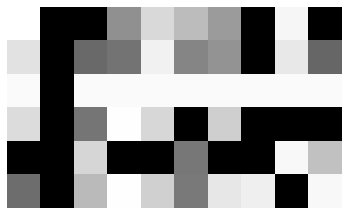

Original image


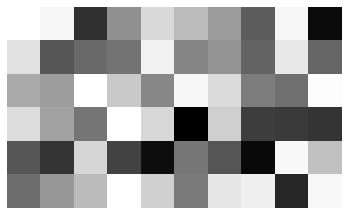

In [103]:
newImg = img.copy()
print("Shape is ",newImg.shape)
# fill third row
print("Third row, initially: ")
pprint.pprint(newImg[2])
newImg[2,:] = 250
print("Third row, modified: ")
pprint.pprint(newImg[2])

# fill second column
newImg[:,1] = 10

# mask all elements with value below below 100
mask = newImg < 100
newImg[mask] = 0
plt.imshow(newImg,cmap="Greys")
plt.axis('off')

# we are now showing the original image for reference. To have two images in the same cell
# we need to call plt.show() explicitly
print("New image")
plt.show()
print("Original image")
plt.imshow(img,cmap="Greys")
_ = plt.axis('off')


## Summary
We have seen that a 2D array has the same data structure as an image and we can convert from one to the other. This enables us to construct raw images using mathematical tools and convert them to images. We can also load images and apply math to the pixel elements.